In [1]:
import os
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
plt.matplotlib.rcParams['figure.figsize'] = (15,15)
plt.matplotlib.rcParams['font.size'] = 30

In [5]:
obs_vi_max = 0.721000016
obs_vi_min = 0.351000011
obs_v_max = 19.9249992
obs_v_min = 15.9259996
sample_pt = 2000000
obs_data = pd.read_csv('C:\\Users\\marti\\Desktop\\school work\\Dartmouth\\M92 project\\M92_fits_with_err_with_loc_with_bin')
len_obs = len(obs_data)
#read AS test error
dps_Ierr = []
dps_Verr = []
for i in range(80):
    dps_Ierr.append(pd.read_csv("C:\\Users\\marti\\Desktop\\school work\\Dartmouth\\M92 project\\M92-20211208T215351Z-001\\M92\\SimulateCMD\\inputfiles\\Ierr{:02d}s.dat".format(i + 1),sep='\s+',skiprows=3,names=['Ierr']))
    dps_Verr.append(pd.read_csv("C:\\Users\\marti\\Desktop\\school work\\Dartmouth\\M92 project\\M92-20211208T215351Z-001\\M92\\SimulateCMD\\inputfiles\\Verr{:02d}s.dat".format(i + 1),sep='\s+',skiprows=3,names=['Verr']))
sample_list = np.random.randint(0,len_obs,size=sample_pt)
Ierr_as = np.zeros(sample_pt)
Verr_as = np.zeros(sample_pt)
for i in range(sample_pt):
    Ierr_as[i] = dps_Ierr[obs_data['Ibin'].values[sample_list[i]]]['Ierr'].values[np.random.randint(0, high=len(dps_Ierr[obs_data['Ibin'].values[sample_list[i]]]))]
    Verr_as[i] = dps_Verr[obs_data['Vbin'].values[sample_list[i]]]['Verr'].values[np.random.randint(0, high=len(dps_Verr[obs_data['Vbin'].values[sample_list[i]]]))]
#    Vvega = obs_data['vv'].values[sample_list] - Verr
#    Ivega = obs_data['ii'].values[sample_list] - Ierr
#data_resample = {'v':Vvega, 'vi':VIvega}
#dp = pd.DataFrame(data=data_resample)
#df_resample = dp[(dp['vi'] < (obs_vi_max)) & (dp['vi'] > (obs_vi_min))& (dp['v'] < (obs_v_max)) & (dp['v'] > (obs_v_min))]
#total_pt = len(df_resample)
Ierr_phot = np.random.normal(0,obs_data['vv_err'].values[sample_list])
Verr_phot = np.random.normal(0,obs_data['vi_err'].values[sample_list])

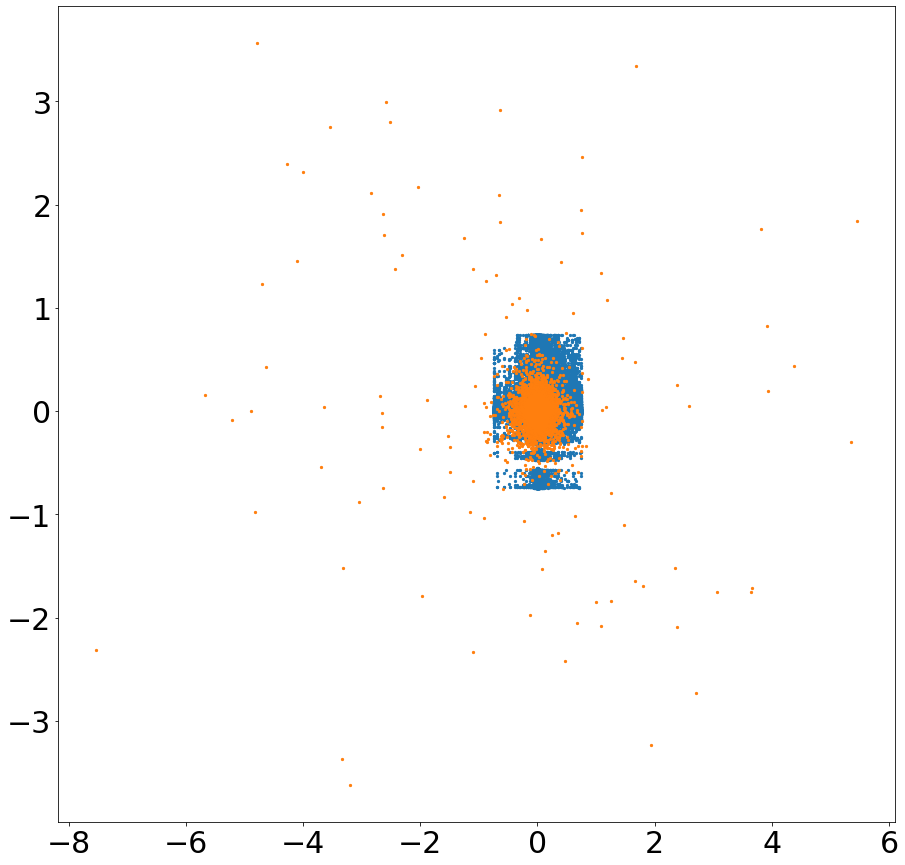

In [25]:
plt.scatter(Verr_as, Ierr_as,s=5)
plt.scatter(Verr_phot, Ierr_phot,s=5)

In [7]:
np.std(Verr_as)

0.06924911535759708

In [8]:
np.std(Verr_phot)

0.027835364388418826

In [9]:
np.mean(Verr_as)

0.011124430515327985

In [10]:
np.mean(Verr_phot)

-1.309504253391888e-05

In [36]:
np.median(Verr_as)

0.000699996948

In [37]:
np.median(Verr_phot)

1.1380898896466223e-05

In [11]:
np.std(Ierr_as)

0.0725847050353109

In [12]:
np.std(Ierr_phot)

0.019114929845209447

In [13]:
np.mean(Ierr_as)

0.011424956472072966

In [14]:
np.mean(Ierr_phot)

2.0311551513921533e-05

In [15]:
np.std(Verr_as - Ierr_as)

0.09953612913327356

In [16]:
np.std(Verr_phot - Ierr_phot)

0.034737306985681025

In [17]:
np.mean(Verr_as - Ierr_as)

-0.00030052595674497497

In [18]:
np.mean(Verr_phot - Ierr_phot)

-3.340659404784042e-05

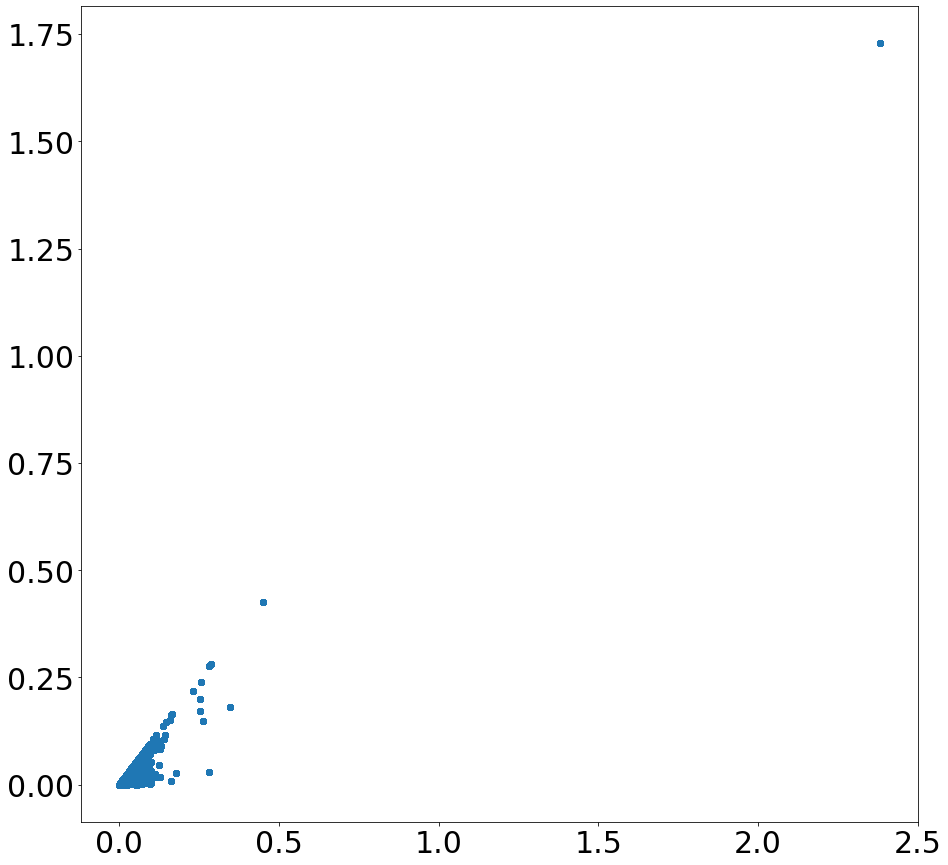

In [4]:
plt.scatter(Verr_phot, Ierr_phot)

In [34]:
Vvega_as = obs_data['vv'].values[sample_list] - Verr_as
Ivega_as = obs_data['ii'].values[sample_list] - Ierr_as
VIvega_as = Vvega_as - Ivega_as
Vvega_phot = obs_data['vv'].values[sample_list] - Verr_phot
Ivega_phot = obs_data['ii'].values[sample_list] - Ierr_phot
VIvega_phot = Vvega_phot - Ivega_phot

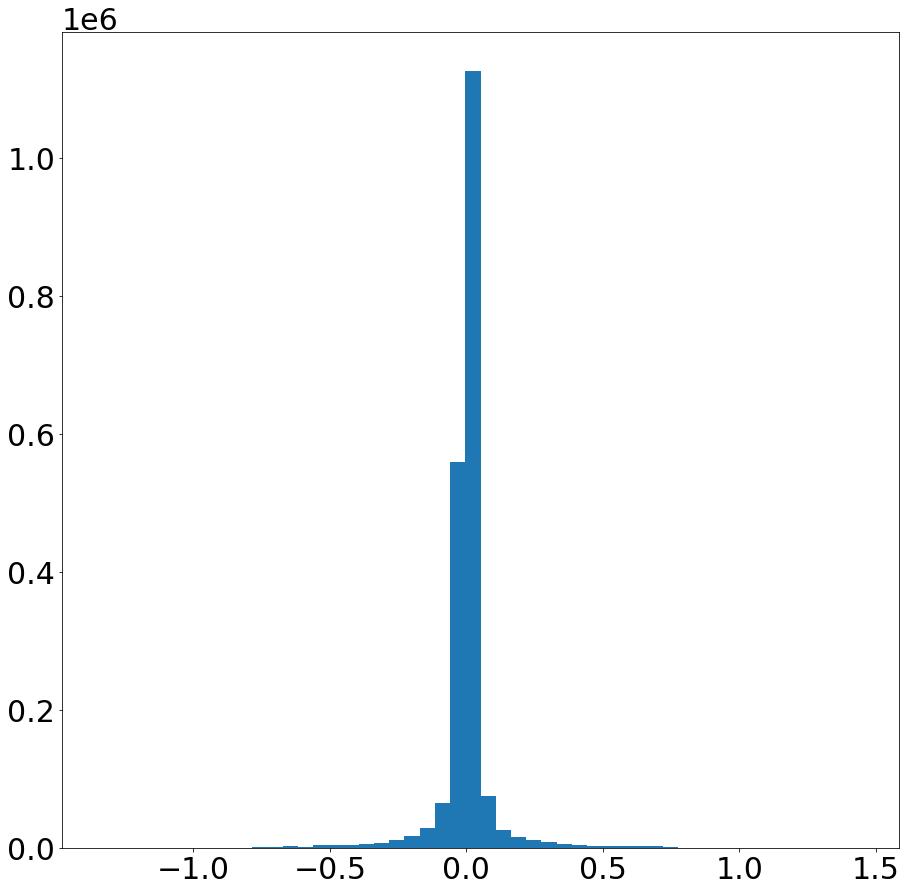

In [32]:
plt.hist(Verr_as - Ierr_as,bins=50);

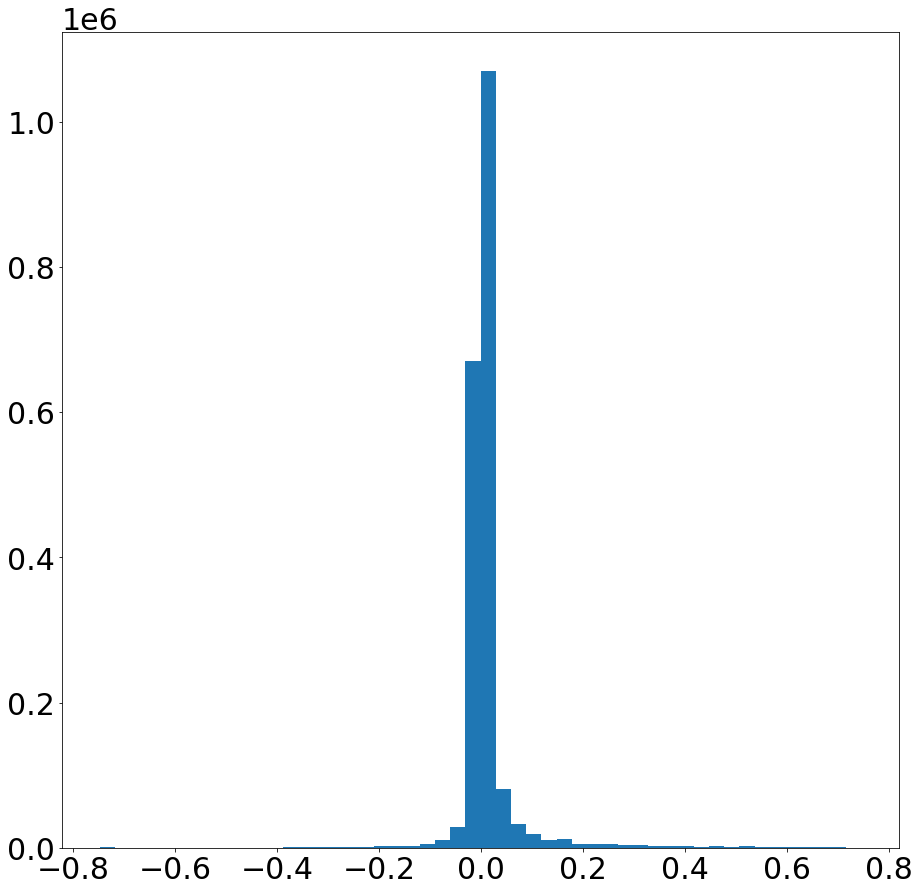

In [33]:
plt.hist(Verr_as,bins=50);

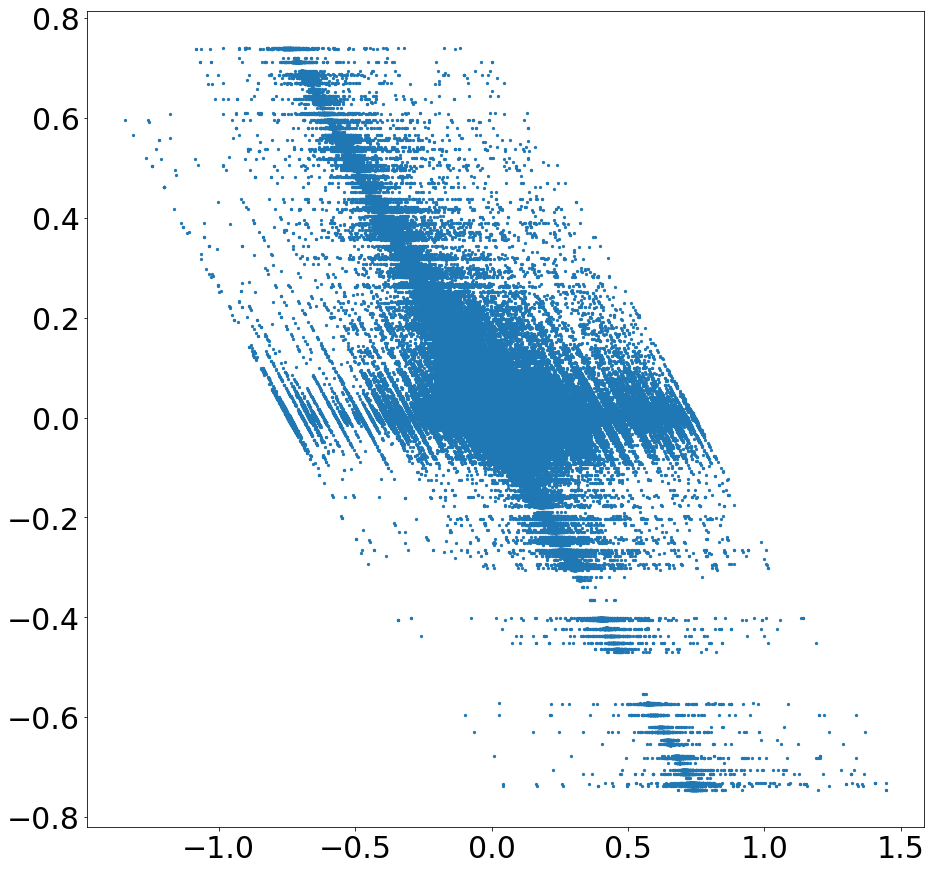

In [29]:
plt.scatter(Verr_as - Ierr_as, Ierr_as,s=5)

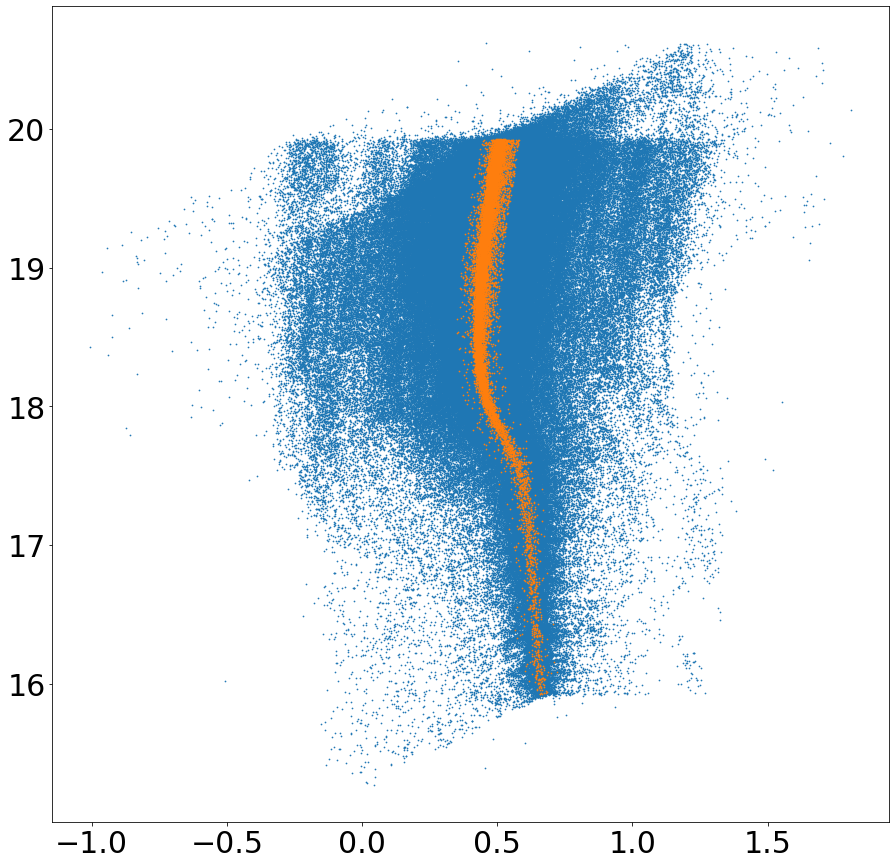

In [28]:
plt.scatter(VIvega_as, Vvega_as,s=0.5)
plt.scatter(obs_data['vi'].values, obs_data['vv'].values,s=0.5)

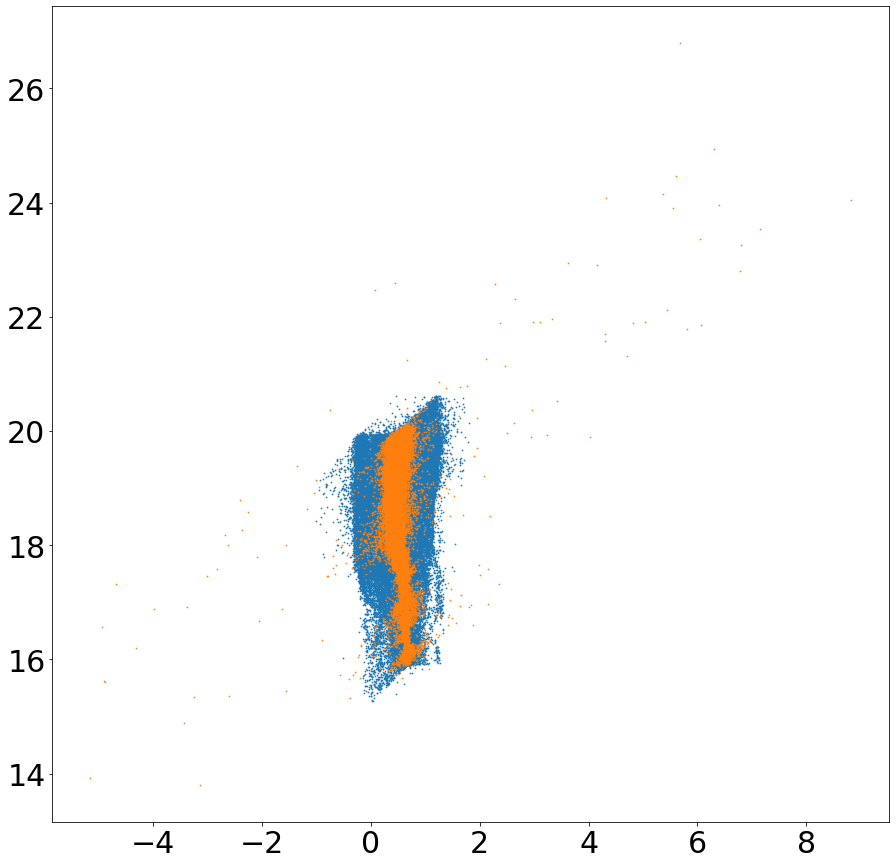

In [35]:
plt.scatter(VIvega_as, Vvega_as,s=0.5)
plt.scatter(VIvega_phot, Vvega_phot,s=0.5)

In [8]:
def search_point_location_bc(x, y, xBar, yBar):
    lenx = len(x)
    delta_x = xBar - x.reshape(lenx,1)
    delta_y = yBar - y.reshape(lenx,1)
    distance = np.square(delta_x) + np.square(delta_y)
    bin_num = np.argmin(distance, axis = 1)
    return bin_num

In [60]:
obs_vi_max = 0.721000016
obs_vi_min = 0.351000011
obs_v_max = 19.9249992
obs_v_min = 15.9259996
sample_pt = 2000000
obs_data = pd.read_csv('C:\\Users\\marti\\Desktop\\school work\\Dartmouth\\M92 project\\M92_fits_with_err_with_loc_with_bin')
len_obs = len(obs_data)
#read AS test error
dps_Ierr = []
dps_Verr = []
for i in range(80):
    dps_Ierr.append(pd.read_csv("C:\\Users\\marti\\Desktop\\school work\\Dartmouth\\M92 project\\M92-20211208T215351Z-001\\M92\\SimulateCMD\\inputfiles\\Ierr{:02d}s.dat".format(i + 1),sep='\s+',skiprows=3,names=['Ierr']))
    dps_Verr.append(pd.read_csv("C:\\Users\\marti\\Desktop\\school work\\Dartmouth\\M92 project\\M92-20211208T215351Z-001\\M92\\SimulateCMD\\inputfiles\\Verr{:02d}s.dat".format(i + 1),sep='\s+',skiprows=3,names=['Verr']))
sample_list = np.random.randint(0,len_obs,size=sample_pt)
Ierr_as = np.zeros(sample_pt)
Verr_as = np.zeros(sample_pt)
for i in range(sample_pt):
    Ierr_as[i] = dps_Ierr[obs_data['Ibin'].values[sample_list[i]]]['Ierr'].values[np.random.randint(0, high=len(dps_Ierr[obs_data['Ibin'].values[sample_list[i]]]))]
    Verr_as[i] = dps_Verr[obs_data['Vbin'].values[sample_list[i]]]['Verr'].values[np.random.randint(0, high=len(dps_Verr[obs_data['Vbin'].values[sample_list[i]]]))]
Vvega = obs_data['vv'].values[sample_list] - Verr_as
Ivega = obs_data['ii'].values[sample_list] - Ierr_as
VIvega = Vvega - Ivega
data_resample = {'v':Vvega, 'vi':VIvega}
dp = pd.DataFrame(data=data_resample)
df_resample = dp[(dp['vi'] < (obs_vi_max)) & (dp['vi'] > (obs_vi_min))& (dp['v'] < (obs_v_max)) & (dp['v'] > (obs_v_min))]
total_pt = len(df_resample)

#resample another list for test
sample_list = np.random.randint(0,len_obs,size=sample_pt)
Ierr_as2 = np.zeros(sample_pt)
Verr_as2 = np.zeros(sample_pt)
for i in range(sample_pt):
    Ierr_as2[i] = dps_Ierr[obs_data['Ibin'].values[sample_list[i]]]['Ierr'].values[np.random.randint(0, high=len(dps_Ierr[obs_data['Ibin'].values[sample_list[i]]]))]
    Verr_as2[i] = dps_Verr[obs_data['Vbin'].values[sample_list[i]]]['Verr'].values[np.random.randint(0, high=len(dps_Verr[obs_data['Vbin'].values[sample_list[i]]]))]
Vvega2 = obs_data['vv'].values[sample_list] - Verr_as2
Ivega2 = obs_data['ii'].values[sample_list] - Ierr_as2
VIvega2 = Vvega2 - Ivega2
data_resample2 = {'v':Vvega2, 'vi':VIvega2}
dp = pd.DataFrame(data=data_resample2)
df_resample2 = dp[(dp['vi'] < (obs_vi_max)) & (dp['vi'] > (obs_vi_min))& (dp['v'] < (obs_v_max)) & (dp['v'] > (obs_v_min))]
total_pt2 = len(df_resample2)

In [106]:
Vvega2 = obs_data['vv'].values[sample_list] - Verr_as2
Ivega2 = obs_data['ii'].values[sample_list] - Ierr_as2
VIvega2 = Vvega2 - Ivega2
data_resample2 = {'v':Vvega2, 'vi':VIvega2}
dp = pd.DataFrame(data=data_resample2)
df_resample2 = dp[(dp['vi'] < (obs_vi_max)) & (dp['vi'] > (obs_vi_min))& (dp['v'] < (obs_v_max)) & (dp['v'] > (obs_v_min))]
total_pt2 = len(df_resample2)

In [107]:
df_resample2

,v,vi
0,18.505900,0.435799
1,19.334800,0.460500
2,19.187700,0.460400
3,19.683500,0.478401
4,19.619099,0.510600
...,...,...
1999995,19.066399,0.409000
1999996,19.346999,0.438299
1999997,18.735400,0.446301
1999998,19.630900,0.493600


In [40]:
obs_data['vv'].values[sample_list]

array([19.341, 19.645, 19.198, ..., 18.637, 18.325, 19.238])

In [9]:
import voronoi_2d_binning

In [94]:
Tb_size = 1000
vorbin_sample_size = 180000
chi2 = []
dp = df_resample
y = dp['v'].values[:vorbin_sample_size]
x = dp['vi'].values[:vorbin_sample_size] * 12.5
signal = np.array([1]*vorbin_sample_size)
noise = np.array([1]*vorbin_sample_size)
targetSN = 15
binNum, xNode, yNode, xBar, yBar, sN, nPixels, scale = voronoi_2d_binning.voronoi_2d_binning(x, y, signal, noise, targetSN, plot=0, quiet=0, pixelsize=1)
#find standard bin count by search through all the theoretical data points
bin_count_std = np.zeros(len(xBar))
n_div = total_pt // Tb_size
for i in range(n_div):
    print(i)
    bin_num = search_point_location_bc((dp['vi'].values[i*Tb_size:(i+1)*Tb_size])*12.5, dp['v'].values[i*Tb_size:(i+1)*Tb_size], xBar, yBar)
    for j in range(Tb_size):
        bin_count_std[bin_num[j]] += 1
#do the last bit
bin_num = search_point_location_bc((dp['vi'].values[n_div*Tb_size:])*12.5, dp['v'].values[n_div*Tb_size:], xBar, yBar)
for j in range(total_pt - n_div*Tb_size):
    bin_count_std[bin_num[j]] += 1
#to avoid divde by 0
for i in range(len(bin_count_std)):
    if bin_count_std[i] == 0:
        bin_count_std[i] += 1
#self.writevorbin(xBar, yBar, bin_count_std)
n_div = total_pt2 // Tb_size
bin_count = np.zeros(len(xBar))
for i in range(n_div):
    print(i)
    bin_num = search_point_location_bc((df_resample2['vi'].values[i*Tb_size:(i+1)*Tb_size])*12.5, df_resample2['v'].values[i*Tb_size:(i+1)*Tb_size], xBar, yBar)
    for j in range(Tb_size):
        bin_count[bin_num[j]] += 1
#do the last bit
bin_num = search_point_location_bc((df_resample2['vi'].values[n_div*Tb_size:])*12.5, df_resample2['v'].values[n_div*Tb_size:], xBar, yBar)
for j in range(total_pt2 - n_div*Tb_size):
    bin_count[bin_num[j]] += 1
for i in range(len(bin_count)):
    if bin_count[i] == 0:
        bin_count[i] += 1
#calculate chi2
chi2 = np.inner(np.divide(bin_count,bin_count_std/(total_pt/total_pt2)) - 1, bin_count - bin_count_std/(total_pt/total_pt2))
print(chi2)

Bin-accretion...
1  /  800
2  /  800
3  /  800
4  /  800
5  /  800
6  /  800
7  /  800
8  /  800
9  /  800
10  /  800
11  /  800
12  /  800
13  /  800
14  /  800
15  /  800
16  /  800
17  /  800
18  /  800
19  /  800
20  /  800
21  /  800
22  /  800
23  /  800
24  /  800
25  /  800
26  /  800
27  /  800
28  /  800
29  /  800
30  /  800
31  /  800
32  /  800
33  /  800
34  /  800
35  /  800
36  /  800
37  /  800
38  /  800
39  /  800
40  /  800
41  /  800
42  /  800
43  /  800
44  /  800
45  /  800
46  /  800
47  /  800
48  /  800
49  /  800
50  /  800
51  /  800
52  /  800
53  /  800
54  /  800
55  /  800
56  /  800
57  /  800
58  /  800
59  /  800
60  /  800
61  /  800
62  /  800
63  /  800
64  /  800
65  /  800
66  /  800
67  /  800
68  /  800
69  /  800
70  /  800
71  /  800
72  /  800
73  /  800
74  /  800
75  /  800
76  /  800
77  /  800
78  /  800
79  /  800
80  /  800
81  /  800
82  /  800
83  /  800
84  /  800
85  /  800
86  /  800
87  /  800
88  /  800
89  /  800
90  /  800
91

693  /  800
694  /  800
695  /  800
696  /  800
697  /  800
698  /  800
699  /  800
700  /  800
701  /  800
702  /  800
703  /  800
704  /  800
705  /  800
706  /  800
707  /  800
708  /  800
709  /  800
710  /  800
711  /  800
712  /  800
713  /  800
714  /  800
715  /  800
716  /  800
717  /  800
718  /  800
719  /  800
720  /  800
721  /  800
722  /  800
723  /  800
724  /  800
725  /  800
726  /  800
727  /  800
728  /  800
729  /  800
730  /  800
731  /  800
732  /  800
733  /  800
734  /  800
735  /  800
736  /  800
737  /  800
738  /  800
739  /  800
740  /  800
741  /  800
742  /  800
743  /  800
744  /  800
745  /  800
746  /  800
747  /  800
748  /  800
749  /  800
750  /  800
751  /  800
752  /  800
753  /  800
754  /  800
755  /  800
756  /  800
757  /  800
758  /  800
759  /  800
760  /  800
761  /  800
762  /  800
763  /  800
764  /  800
765  /  800
766  /  800
767  /  800
768  /  800
769  /  800
770  /  800
771  /  800
772  /  800
773  /  800
774  /  800
775  /  800
776 

1454
1455
1456
1457
1458
1459
1460
1461
1462
1463
1464
1465
1466
1467
1468
1469
1470
1471
1472
1473
1474
1475
1476
1477
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
1490
1491
1492
1493
1494
1495
1496
1497
1498
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605
1606
1607
1608
1609
1610
1611
1612
1613
1614
1615
1616
1617
1618
1619
1620
1621
1622
1623
1624
1625
1626
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642
1643
1644
1645
1646
1647
1648
1649
1650
1651
1652
1653


1462
1463
1464
1465
1466
1467
1468
1469
1470
1471
1472
1473
1474
1475
1476
1477
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
1490
1491
1492
1493
1494
1495
1496
1497
1498
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605
1606
1607
1608
1609
1610
1611
1612
1613
1614
1615
1616
1617
1618
1619
1620
1621
1622
1623
1624
1625
1626
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642
1643
1644
1645
1646
1647
1648
1649
1650
1651
1652
1653
1654
1655
1656
1657
1658
1659
1660
1661


In [108]:
n_div = total_pt2 // Tb_size
bin_count = np.zeros(len(xBar))
for i in range(n_div):
    print(i)
    bin_num = search_point_location_bc((df_resample2['vi'].values[i*Tb_size:(i+1)*Tb_size])*12.5, df_resample2['v'].values[i*Tb_size:(i+1)*Tb_size], xBar, yBar)
    for j in range(Tb_size):
        bin_count[bin_num[j]] += 1
#do the last bit
bin_num = search_point_location_bc((df_resample2['vi'].values[n_div*Tb_size:])*12.5, df_resample2['v'].values[n_div*Tb_size:], xBar, yBar)
for j in range(total_pt2 - n_div*Tb_size):
    bin_count[bin_num[j]] += 1
for i in range(len(bin_count)):
    if bin_count[i] == 0:
        bin_count[i] += 1
#calculate chi2
chi2 = np.inner(np.divide(bin_count,bin_count_std/(total_pt/total_pt2)) - 1, bin_count - bin_count_std/(total_pt/total_pt2))
print(chi2)
#pritn(bin_count - bin_count_std/(total_pt/total_pt2))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [77]:
max(bin_count - bin_count_std/(total_pt/total_pt2))

1241.980244296943

In [109]:
bin_count

array([2158., 2260., 2854., 2196., 2064., 2183., 2320., 2709., 2522.,
       1821., 2130., 2062., 2077., 2299., 1934., 2219., 2070., 2271.,
       1894., 2249., 2135., 2720., 2784., 2729., 2480., 2051., 2032.,
       2562., 2607., 2408., 2263., 2349., 2508., 3176., 2377., 2309.,
       2295., 2777., 2702., 2320., 2456., 2709., 2557., 2779., 2857.,
       2137., 1807., 2949., 2612., 2619., 2636., 2500., 2791., 2917.,
       2061., 2549., 2985., 2731., 2437., 2969., 2335., 2510., 2825.,
       2477., 2256., 2226., 2770., 2392., 2850., 2355., 2200., 2172.,
       2820., 2676., 2618., 2603., 2563., 2421., 1837., 2206., 2586.,
       2328., 2477., 2824., 2969., 2288., 2045., 2862., 2640., 2911.,
       2696., 2580., 2703., 2408., 2817., 2792., 2400., 2874., 2979.,
       2448., 2723., 2568., 2392., 2521., 2337., 3043., 2780., 2227.,
       2867., 2050., 2564., 2738., 2784., 2535., 1922., 2436., 2808.,
       2464., 2161., 2549., 2570., 2114., 1880., 2215., 2090., 2017.,
       3023., 2169.,

In [95]:
np.divide(bin_count,bin_count_std/(total_pt/total_pt2))

array([4.60172231e-04, 4.51070388e-04, 3.46756373e-04, 4.51277968e-04,
       5.01343059e-04, 4.51277968e-04, 4.17288095e-04, 3.60259744e-04,
       3.94777385e-04, 5.43283670e-04, 4.57382007e-04, 5.08360303e-04,
       4.56955743e-04, 4.28221408e-04, 4.96017716e-04, 4.23414086e-04,
       4.95516434e-04, 4.31044846e-04, 5.05999496e-04, 4.46348213e-04,
       4.71002413e-04, 3.59863128e-04, 3.62523853e-04, 3.65905606e-04,
       3.96854320e-04, 4.73504116e-04, 4.84978746e-04, 3.71308983e-04,
       3.86225689e-04, 4.29911014e-04, 4.40335439e-04, 4.35253894e-04,
       3.80973980e-04, 3.22787039e-04, 4.25804179e-04, 4.05050402e-04,
       4.30666238e-04, 3.47247530e-04, 3.66178874e-04, 4.25989150e-04,
       3.86073631e-04, 3.64680931e-04, 3.85012573e-04, 3.40495494e-04,
       3.56981079e-04, 4.59525316e-04, 5.31217239e-04, 3.26440421e-04,
       3.78913069e-04, 3.78913069e-04, 3.81715463e-04, 4.00255928e-04,
       3.54657151e-04, 3.28959082e-04, 4.33905763e-04, 3.83207121e-04,
      

In [91]:
sum(bin_count_std)

1373.0

In [79]:
from scipy.spatial import Voronoi, voronoi_plot_2d

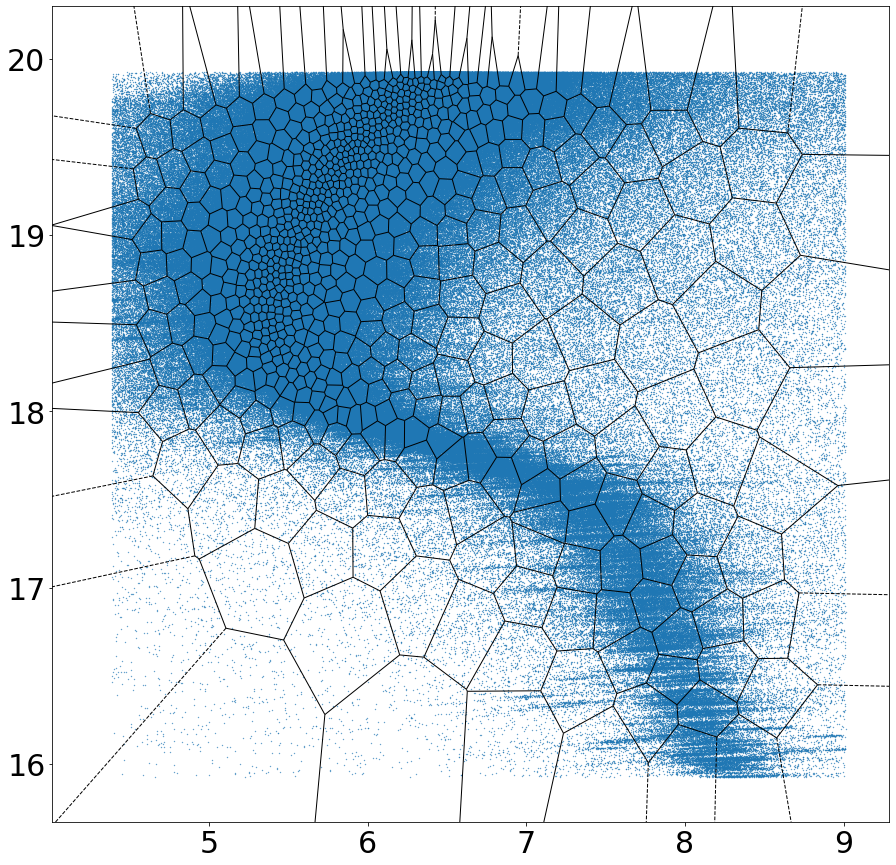

In [121]:
points=np.vstack((xBar, yBar)).T
points[:,0] = points[:,0]
vor = Voronoi(points)
fig = voronoi_plot_2d(vor,show_points=False,show_vertices=False)
#dp = pd.read_csv("C:/Users/marti/Desktop/share/good_chi2/mc10045.a13000",sep='\s+',skiprows = 3,names=['vi','v','i'])
#vi = dp['vi'].values[:14000]*12.5 + 0.02*12.5
#v = dp['v'].values[:14000]  + 14.73
#plt.scatter(vi, v, s=0.1,c='g')
dp = df_resample
plt.scatter(dp['vi'].values*12.5,dp['v'].values,s=0.1)
plt.show()

In [111]:
#resample another list for test
sample_list = np.random.randint(0,len_obs,size=sample_pt)
Ierr_as2 = np.zeros(sample_pt)
Verr_as2 = np.zeros(sample_pt)
for i in range(sample_pt):
    Ierr_as2[i] = dps_Ierr[obs_data['Ibin'].values[sample_list[i]]]['Ierr'].values[np.random.randint(0, high=len(dps_Ierr[obs_data['Ibin'].values[sample_list[i]]]))]
    Verr_as2[i] = dps_Verr[obs_data['Vbin'].values[sample_list[i]]]['Verr'].values[np.random.randint(0, high=len(dps_Verr[obs_data['Vbin'].values[sample_list[i]]]))]
Vvega2 = obs_data['vv'].values[sample_list] - Verr_as2
Ivega2 = obs_data['ii'].values[sample_list] - Ierr_as2
VIvega2 = Vvega2 - Ivega2
data_resample2 = {'v':Vvega2, 'vi':VIvega2}
dp = pd.DataFrame(data=data_resample2)
df_resample2 = dp[(dp['vi'] < (obs_vi_max)) & (dp['vi'] > (obs_vi_min))& (dp['v'] < (obs_v_max)) & (dp['v'] > (obs_v_min))]
total_pt2 = len(df_resample2)
#self.writevorbin(xBar, yBar, bin_count_std)
n_div = total_pt2 // Tb_size
bin_count = np.zeros(len(xBar))
for i in range(n_div):
    print(i)
    bin_num = search_point_location_bc((df_resample2['vi'].values[i*Tb_size:(i+1)*Tb_size])*12.5, df_resample2['v'].values[i*Tb_size:(i+1)*Tb_size], xBar, yBar)
    for j in range(Tb_size):
        bin_count[bin_num[j]] += 1
#do the last bit
bin_num = search_point_location_bc((df_resample2['vi'].values[n_div*Tb_size:])*12.5, df_resample2['v'].values[n_div*Tb_size:], xBar, yBar)
for j in range(total_pt2 - n_div*Tb_size):
    bin_count[bin_num[j]] += 1
for i in range(len(bin_count)):
    if bin_count[i] == 0:
        bin_count[i] += 1
#calculate chi2
chi2 = np.inner(np.divide(bin_count,bin_count_std/(total_pt/total_pt2)) - 1, bin_count - bin_count_std/(total_pt/total_pt2))
print(chi2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [116]:
df_resample2 = pd.read_csv('C:/Users/marti/Desktop/share/outcmd_bf3/mc10045.a14000',skiprows=3,names=['vi','v','i'],sep='\s+')
red = 0.01
dm = 14.63
total_pt2 = len(df_resample2)
#self.writevorbin(xBar, yBar, bin_count_std)
n_div = total_pt2 // Tb_size
bin_count = np.zeros(len(xBar))
for i in range(n_div):
    print(i)
    bin_num = search_point_location_bc((df_resample2['vi'].values[i*Tb_size:(i+1)*Tb_size]+red)*12.5, df_resample2['v'].values[i*Tb_size:(i+1)*Tb_size]+dm, xBar, yBar)
    for j in range(Tb_size):
        bin_count[bin_num[j]] += 1
#do the last bit
bin_num = search_point_location_bc((df_resample2['vi'].values[n_div*Tb_size:]+red)*12.5, df_resample2['v'].values[n_div*Tb_size:]+dm, xBar, yBar)
for j in range(total_pt2 - n_div*Tb_size):
    bin_count[bin_num[j]] += 1
for i in range(len(bin_count)):
    if bin_count[i] == 0:
        bin_count[i] += 1
#calculate chi2
chi2 = np.inner(np.divide(bin_count,bin_count_std/(total_pt/total_pt2)) - 1, bin_count - bin_count_std/(total_pt/total_pt2))
print(chi2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
991128.5035612691


In [124]:
bin_count - bin_count_std

array([-8.0400e+02, -5.9300e+02, -8.6200e+02, -9.4500e+02, -2.5100e+02,
        2.3000e+01,  1.9800e+02, -1.2050e+03,  9.1000e+01, -8.9000e+01,
       -1.4600e+02, -1.2000e+01, -1.1300e+02, -1.1400e+02,  4.8000e+01,
        7.3000e+01, -2.2300e+02, -3.3600e+02, -6.5500e+02,  2.9200e+02,
        1.6800e+02, -1.3500e+02,  1.7900e+02, -2.1500e+02, -2.7000e+02,
        1.2140e+03, -4.4400e+02,  5.9000e+01,  9.3300e+02,  7.6800e+02,
        2.7700e+02,  2.4860e+03,  9.9700e+02,  2.4970e+03,  7.1700e+02,
        7.0000e+00,  1.5560e+03,  2.9300e+03,  2.1030e+03,  2.9160e+03,
        2.3340e+03,  1.4980e+03,  2.5270e+03,  1.6960e+03,  3.0380e+03,
        2.4380e+03,  1.3570e+03,  2.9870e+03,  3.3930e+03,  2.3260e+03,
        1.6060e+03,  2.5480e+03,  2.4280e+03,  1.3660e+03,  1.8930e+03,
       -5.0000e+00,  1.0740e+03, -1.4200e+02,  8.8400e+02,  1.9680e+03,
        7.9000e+01,  2.2440e+03,  1.5330e+03, -6.4000e+02,  7.3800e+02,
        1.4700e+02,  3.0400e+02,  3.6000e+02,  6.5000e+01,  1.53

In [122]:
df_resample2 = pd.read_csv('C:/Users/marti/Desktop/share/outcmd_bf3/mc10045.a14000',skiprows=3,names=['vi','v','i'],sep='\s+')
red = 0.01
dm = 14.73
total_pt2 = len(df_resample2)
#self.writevorbin(xBar, yBar, bin_count_std)
n_div = total_pt2 // Tb_size
bin_count = np.zeros(len(xBar))
for i in range(n_div):
    print(i)
    bin_num = search_point_location_bc((df_resample2['vi'].values[i*Tb_size:(i+1)*Tb_size]+red)*12.5, df_resample2['v'].values[i*Tb_size:(i+1)*Tb_size]+dm, xBar, yBar)
    for j in range(Tb_size):
        bin_count[bin_num[j]] += 1
#do the last bit
bin_num = search_point_location_bc((df_resample2['vi'].values[n_div*Tb_size:]+red)*12.5, df_resample2['v'].values[n_div*Tb_size:]+dm, xBar, yBar)
for j in range(total_pt2 - n_div*Tb_size):
    bin_count[bin_num[j]] += 1
for i in range(len(bin_count)):
    if bin_count[i] == 0:
        bin_count[i] += 1
#calculate chi2
chi2 = np.inner(np.divide(bin_count,bin_count_std/(total_pt/total_pt2)) - 1, bin_count - bin_count_std/(total_pt/total_pt2))
print(chi2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
772735.3034806576


In [123]:
bin_count

array([1.3270e+03, 1.5810e+03, 1.9660e+03, 1.2280e+03, 1.7050e+03,
       2.1960e+03, 2.5480e+03, 1.5170e+03, 2.5750e+03, 1.7160e+03,
       1.9980e+03, 1.9170e+03, 2.0330e+03, 2.1760e+03, 2.0250e+03,
       2.3890e+03, 1.7560e+03, 1.9390e+03, 1.2830e+03, 2.4890e+03,
       2.2500e+03, 2.5900e+03, 2.8840e+03, 2.4650e+03, 2.2010e+03,
       3.2850e+03, 1.5780e+03, 2.7000e+03, 3.4720e+03, 3.0490e+03,
       2.5040e+03, 4.7390e+03, 3.5710e+03, 5.5350e+03, 3.0200e+03,
       2.4280e+03, 3.8330e+03, 5.7540e+03, 4.7810e+03, 5.2180e+03,
       4.8740e+03, 4.1870e+03, 5.0740e+03, 4.5760e+03, 5.7850e+03,
       4.5720e+03, 3.2030e+03, 5.9910e+03, 5.9810e+03, 4.9140e+03,
       4.1750e+03, 4.9980e+03, 5.1930e+03, 4.3470e+03, 4.1530e+03,
       2.5540e+03, 4.1020e+03, 2.5550e+03, 3.3110e+03, 4.9150e+03,
       2.4640e+03, 4.8180e+03, 4.3110e+03, 1.8960e+03, 3.0580e+03,
       2.4430e+03, 3.0600e+03, 2.7410e+03, 2.8250e+03, 4.0120e+03,
       1.5040e+03, 4.3740e+03, 2.3370e+03, 2.5430e+03, 1.7230e

In [119]:
df_resample2 = pd.read_csv('C:/Users/marti/Desktop/share/outcmd_bf3/mc10045.a14000',skiprows=3,names=['vi','v','i'],sep='\s+')
red = 0.05
dm = 14.63
total_pt2 = len(df_resample2)
#self.writevorbin(xBar, yBar, bin_count_std)
n_div = total_pt2 // Tb_size
bin_count = np.zeros(len(xBar))
for i in range(n_div):
    print(i)
    bin_num = search_point_location_bc((df_resample2['vi'].values[i*Tb_size:(i+1)*Tb_size]+red)*12.5, df_resample2['v'].values[i*Tb_size:(i+1)*Tb_size]+dm, xBar, yBar)
    for j in range(Tb_size):
        bin_count[bin_num[j]] += 1
#do the last bit
bin_num = search_point_location_bc((df_resample2['vi'].values[n_div*Tb_size:]+red)*12.5, df_resample2['v'].values[n_div*Tb_size:]+dm, xBar, yBar)
for j in range(total_pt2 - n_div*Tb_size):
    bin_count[bin_num[j]] += 1
for i in range(len(bin_count)):
    if bin_count[i] == 0:
        bin_count[i] += 1
#calculate chi2
chi2 = np.inner(np.divide(bin_count,bin_count_std/(total_pt/total_pt2)) - 1, bin_count - bin_count_std/(total_pt/total_pt2))
print(chi2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
12445803.686013052


In [53]:
pd.read_csv('C:/Users/marti/Desktop/share/outcmd_bf3/mc10045.a14000',skiprows=3,names=['vi','v','i'],sep='\s+')

,vi,v,i
0,0.447235,4.080780,3.633545
1,0.437924,4.164931,3.727007
2,0.428661,4.185173,3.756512
3,0.480059,4.905973,4.425914
4,0.455538,3.776509,3.320971
...,...,...,...
1903368,0.424579,3.972709,3.548131
1903369,0.417711,4.046080,3.628369
1903370,0.403256,4.364960,3.961704
1903371,0.448306,4.236056,3.787750


In [125]:
obs_data = pd.read_csv('C:\\Users\\marti\\Desktop\\school work\\Dartmouth\\M92 project\\M92_fits_with_err_with_loc_with_bin')

In [126]:
obs_data

,vv,vv_err,vi,vi_err,ii,ii_err,x,y,r,Ibin,Vbin
0,15.926,0.0034,0.658,0.0050,15.268,0.0037,3510.340,3553.408,769.974190,2,2
1,15.927,0.0035,0.659,0.0052,15.268,0.0039,2384.796,1406.152,1708.024677,7,7
2,15.927,0.0035,0.665,0.0052,15.262,0.0038,2125.076,2395.353,1039.830033,3,3
3,15.931,0.0034,0.661,0.0051,15.270,0.0038,2994.141,3008.359,33.889302,0,0
4,15.932,0.0034,0.682,0.0051,15.250,0.0038,2746.588,3235.291,307.851041,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18072,19.925,0.0480,0.521,0.0577,19.404,0.0320,3076.894,2825.809,221.265748,70,70
18073,19.925,0.0060,0.511,0.0092,19.414,0.0070,3415.218,2205.107,927.942741,73,73
18074,19.925,0.0300,0.528,0.0304,19.397,0.0050,2671.978,3297.181,404.351736,70,70
18075,19.925,0.0050,0.506,0.0112,19.419,0.0100,4199.286,3156.640,1246.708164,75,75


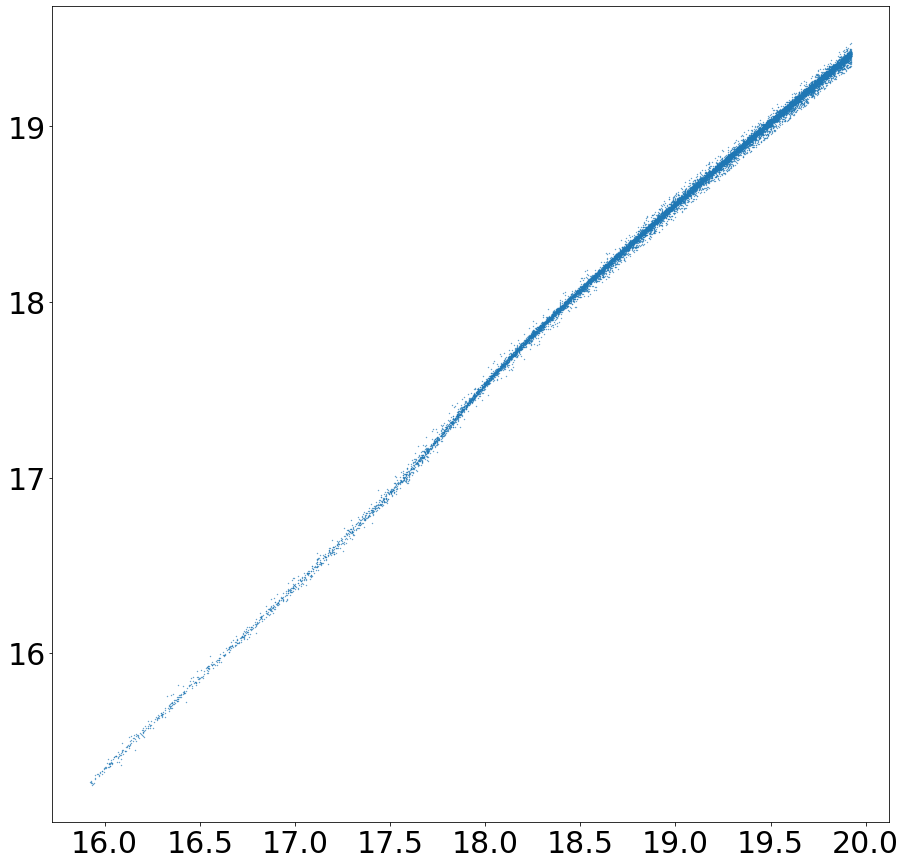

In [128]:
plt.scatter(obs_data['vv'],obs_data['ii'],s=0.1)
plt.xlim

In [129]:
from scipy.optimize import curve_fit

In [130]:
def test(x, a, b):
    return a*x + b
param, param_cov = curve_fit(test, obs_data['vv'].values, obs_data['ii'].values)

In [131]:
param

array([ 1.01733904, -0.80374071])

In [132]:
param_cov

array([[ 1.98006404e-07, -3.75776451e-06],
       [-3.75776451e-06,  7.14288053e-05]])

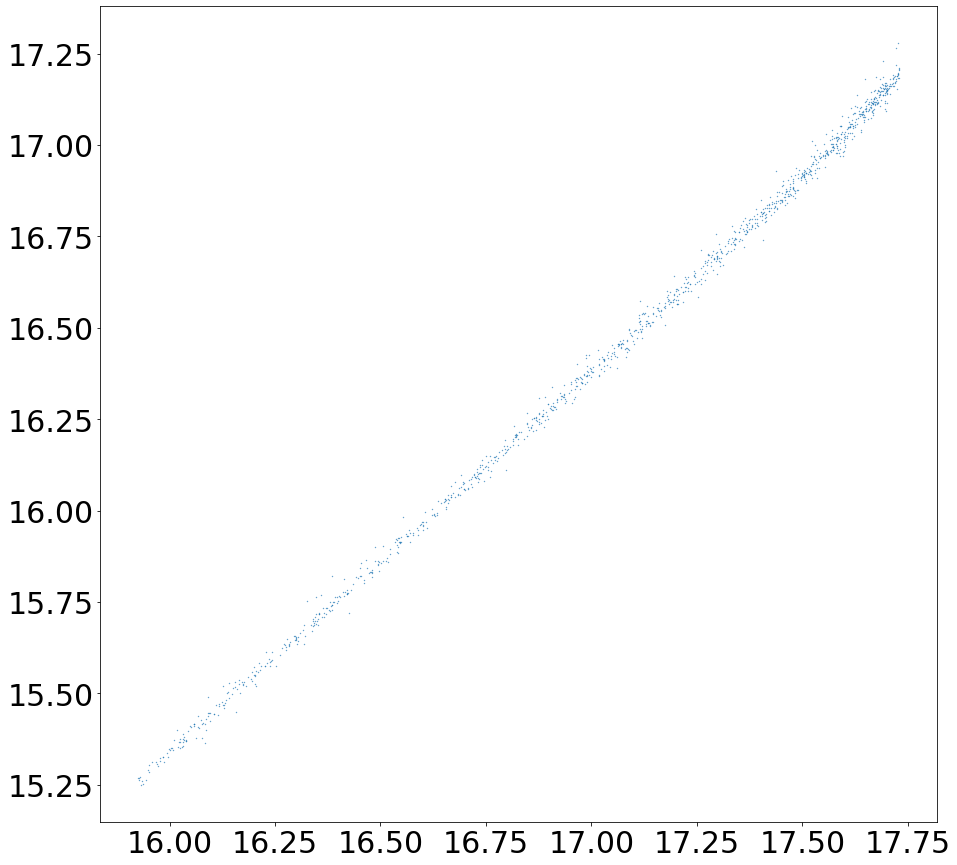

In [139]:
st = 0
ed = 1200
plt.scatter(obs_data['vv'].values[st:ed],obs_data['ii'].values[st:ed],s=0.1)

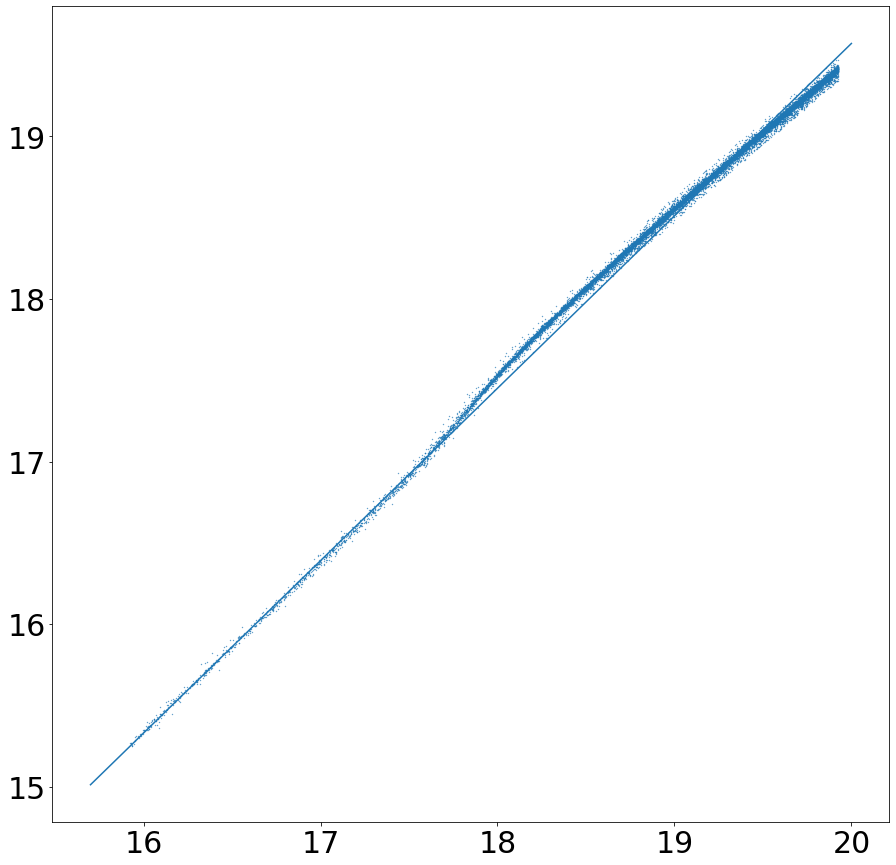

In [140]:
def test(x, a, b):
    return a*x + b
param, param_cov = curve_fit(test, obs_data['vv'].values[st:ed], obs_data['ii'].values[st:ed])
plt.scatter(obs_data['vv'],obs_data['ii'],s=0.1)
x = np.linspace(15.7,20.0,1000)
plt.plot(x,param[0]*x + param[1])

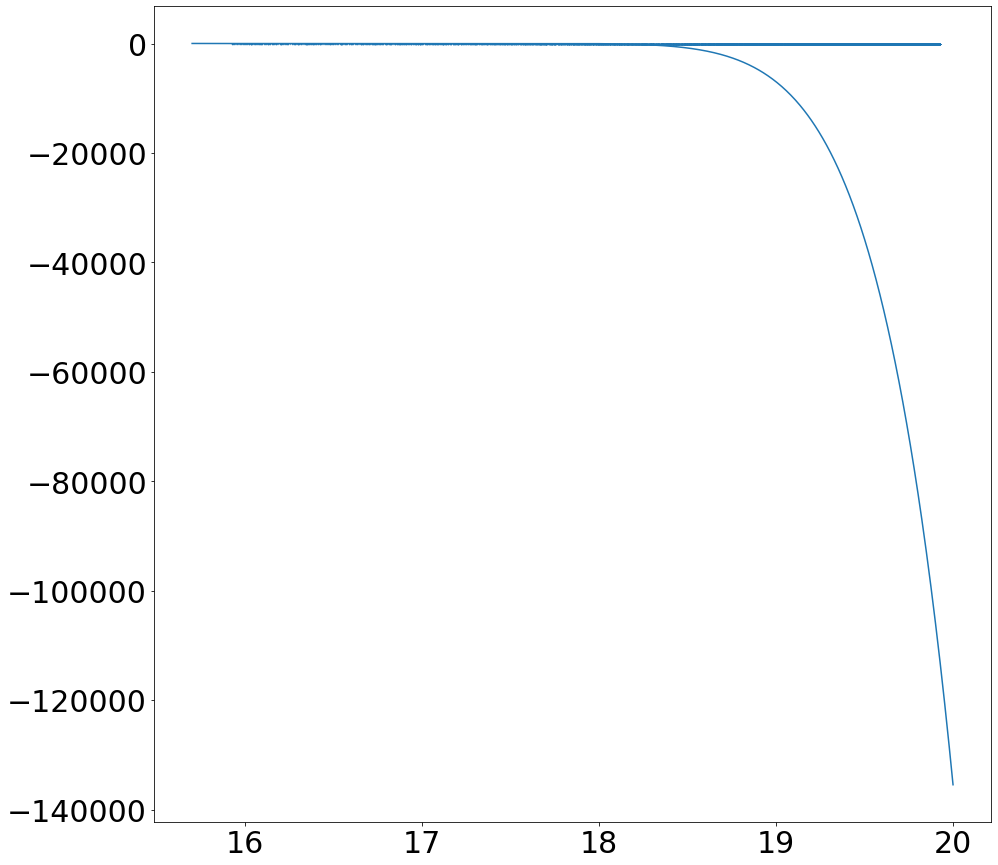

In [141]:
def test(x, a, b, c, d, e, f, g, h, i, j, k, l):
    return a*x*x**11 + b*x**10 + c*x**9 + d*x**8 + e*x**7 + f*x**6 + g*x**5 + h*x**4 + i*x**3 + j*x**2 + k*x + l
[a, b, c, d, e, f, g, h, i, j, k, l], param_cov = curve_fit(test, obs_data['vv'].values[st:ed], obs_data['ii'].values[st:ed])
plt.scatter(obs_data['vv'],obs_data['ii'],s=0.1)
x = np.linspace(15.7,20.0,1000)
plt.plot(x,a*x*x**11 + b*x**10 + c*x**9 + d*x**8 + e*x**7 + f*x**6 + g*x**5 + h*x**4 + i*x**3 + j*x**2 + k*x + l)

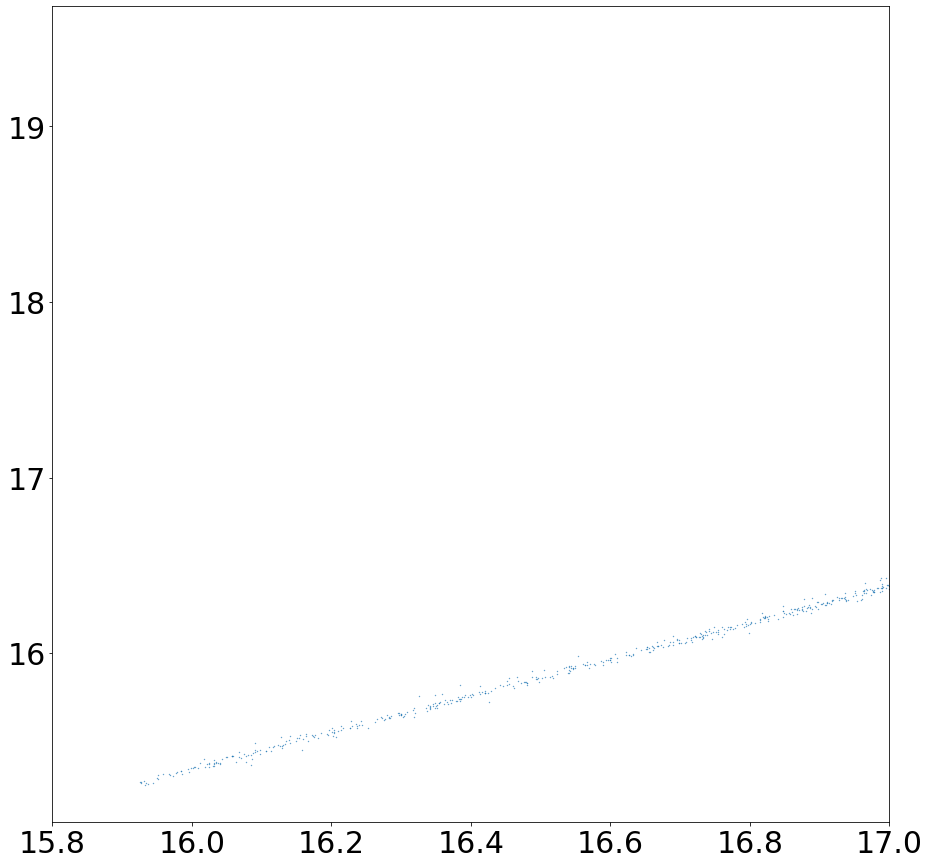

In [144]:
plt.scatter(obs_data['vv'],obs_data['ii'],s=0.1)
plt.xlim(15.8,17.0);
plt.ylim(15.8)

In [147]:
vv = np.array([15.925,16.029,16.177,16.402,16.583,16.770,16.874,17.002,17.224,17.616,17.881,17.900,17.999,18.100,18.256,18.430,18.588,18.736,18.860,19.155,19.412,19.578,19.825,19.911,19.927])
ii = np.array([15.256,15.374,15.535,15.769,15.944,16.143,16.246,16.392,16.623,17.057,17.389,17.416,17.535,17.655,17.826,18.000,18.155,18.308,18.431,18.706,18.949,19.100,19.335,19.403,19.423])

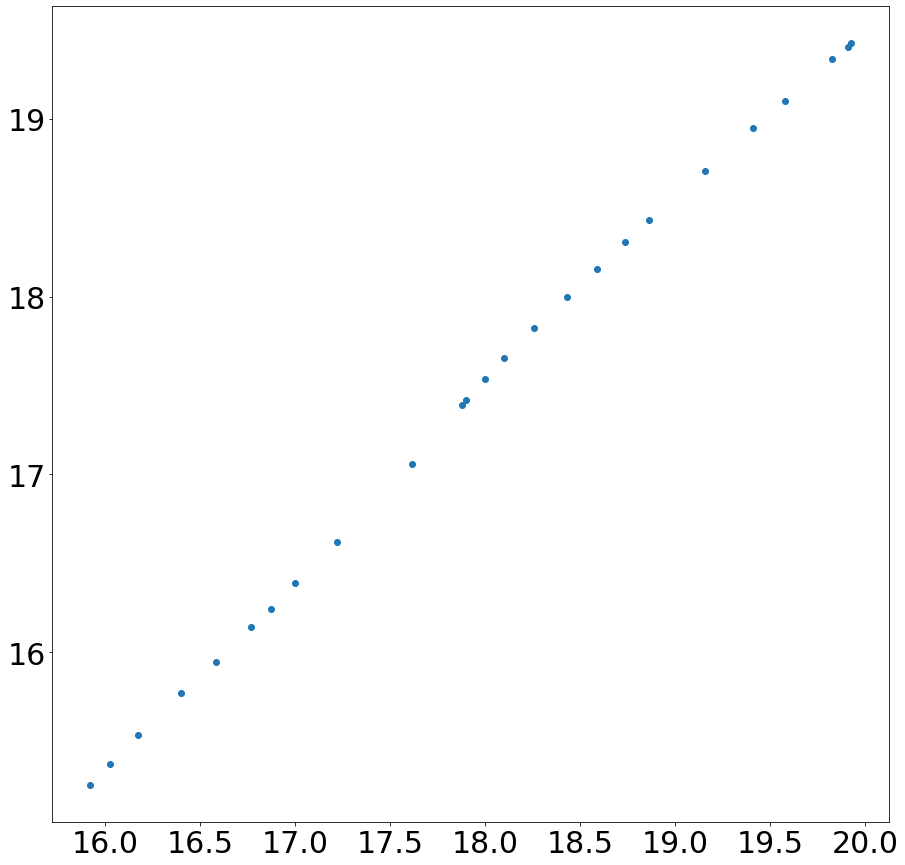

In [148]:
plt.scatter(vv,ii)

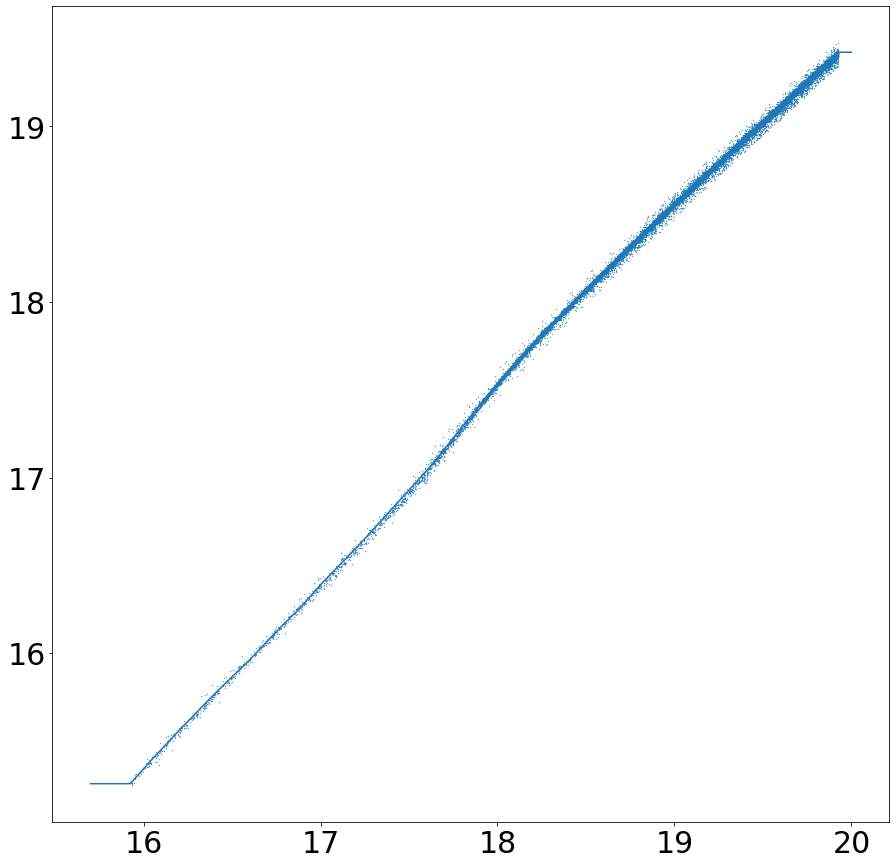

In [150]:
x = np.linspace(15.7,20.0,1000)
y = np.interp(x,vv,ii)
plt.scatter(obs_data['vv'],obs_data['ii'],s=0.1)
plt.plot(x,y)

In [155]:
dp = obs_data.copy()
zero_list = np.zeros(len(dp) - 1)
dp = dp[dp['Vbin'] == zero_list]

ValueError: ('Lengths must match to compare', (18077,), (18076,))

In [154]:
dp

,vv,vv_err,vi,vi_err,ii,ii_err,x,y,r,Ibin,Vbin
3,15.931,0.0034,0.661,0.0051,15.270,0.0038,2994.141,3008.359,33.889302,0,0
4,15.932,0.0034,0.682,0.0051,15.250,0.0038,2746.588,3235.291,307.851041,0,0
7,15.944,0.0034,0.682,0.0051,15.262,0.0038,2828.540,3282.550,299.203521,0,0
8,15.950,0.0034,0.660,0.0051,15.290,0.0038,3120.940,2839.276,237.147444,0,0
12,15.967,0.0035,0.655,0.0052,15.312,0.0039,2654.172,3081.025,313.787646,0,0
18,15.985,0.0035,0.658,0.0052,15.327,0.0039,2969.947,2963.184,51.780086,0,0
19,15.986,0.0035,0.675,0.0052,15.311,0.0039,2765.664,3158.066,242.430426,0,0
28,16.017,0.0036,0.618,0.0054,15.399,0.0041,2527.771,3045.948,434.144253,0,0
31,16.024,0.0035,0.657,0.0053,15.367,0.0040,3190.091,2676.407,408.242452,0,0
34,16.030,0.0035,0.676,0.0053,15.354,0.0039,3146.030,3264.914,311.795738,0,0


In [11]:
Tb_size = 1000
vorbin_sample_size = 180000
for i in range(100):
    print("Starting {}th run".format(i))
    dp = pd.read_csv("C:\\Users\\marti\\Desktop\\school work\\Dartmouth\\M92 project\\resample_with_bin\\resample_{}".format(np.random.randint(600)))
    total_pt = len(dp)
    y = dp['v'].values[:vorbin_sample_size]
    x = dp['vi'].values[:vorbin_sample_size] * 12.5
    signal = np.array([1]*vorbin_sample_size)
    noise = np.array([1]*vorbin_sample_size)
    targetSN = 15
    binNum, xNode, yNode, xBar, yBar, sN, nPixels, scale = voronoi_2d_binning.voronoi_2d_binning(x, y, signal, noise, targetSN, plot=0, quiet=1, pixelsize=1)
    #find standard bin count by search through all the theoretical data points
    bin_count_std = np.zeros(len(xBar))
    n_div = total_pt // Tb_size
    for i in range(n_div):
        bin_num = search_point_location_bc((dp['vi'].values[i*Tb_size:(i+1)*Tb_size])*12.5, dp['v'].values[i*Tb_size:(i+1)*Tb_size], xBar, yBar)
        for j in range(Tb_size):
            bin_count_std[bin_num[j]] += 1
    #do the last bit
    bin_num = search_point_location_bc((dp['vi'].values[n_div*Tb_size:])*12.5, dp['v'].values[n_div*Tb_size:], xBar, yBar)
    for j in range(total_pt - n_div*Tb_size):
        bin_count_std[bin_num[j]] += 1
    #to avoid divde by 0
    for i in range(len(bin_count_std)):
        if bin_count_std[i] == 0:
            bin_count_std[i] += 1
    #self.writevorbin(xBar, yBar, bin_count_std)
    df_resample2 = pd.read_csv("C:\\Users\\marti\\Desktop\\school work\\Dartmouth\\M92 project\\resample_with_bin\\resample_{}".format(np.random.randint(600)))
    total_pt2 = len(df_resample2)
    n_div = total_pt2 // Tb_size
    bin_count = np.zeros(len(xBar))
    for i in range(n_div):
        bin_num = search_point_location_bc((df_resample2['vi'].values[i*Tb_size:(i+1)*Tb_size])*12.5, df_resample2['v'].values[i*Tb_size:(i+1)*Tb_size], xBar, yBar)
        for j in range(Tb_size):
            bin_count[bin_num[j]] += 1
    #do the last bit
    bin_num = search_point_location_bc((df_resample2['vi'].values[n_div*Tb_size:])*12.5, df_resample2['v'].values[n_div*Tb_size:], xBar, yBar)
    for j in range(total_pt2 - n_div*Tb_size):
        bin_count[bin_num[j]] += 1
    for i in range(len(bin_count)):
        if bin_count[i] == 0:
            bin_count[i] += 1
    #calculate chi2
    chi2 = np.inner(np.divide(bin_count,bin_count_std/(total_pt/total_pt2)) - 1, bin_count - bin_count_std/(total_pt/total_pt2))
    print(chi2)

Starting 0th run
1708.730979303696
Starting 1th run
1626.94176031873
Starting 2th run
1642.1266955132583
Starting 3th run
1501.6138822893918
Starting 4th run
1608.9243207975605
Starting 5th run
1580.364611582507
Starting 6th run
1508.1824176948394
Starting 7th run
1736.3888361386628
Starting 8th run
1647.1873993990719
Starting 9th run
1744.6884899798877
Starting 10th run
1670.7326110506829
Starting 11th run
1561.1981419670506
Starting 12th run
1647.989466351637
Starting 13th run
1633.1771626487973
Starting 14th run
1694.8143711942726
Starting 15th run


KeyboardInterrupt: 

In [6]:
pd.read_csv("C:\\Users\\marti\\Desktop\\school work\\Dartmouth\\M92 project\\resample_with_bin\\resample_{}".format(np.random.randint(600)))

,v,vi
0,18.203199,0.500899
1,18.137700,0.455200
2,18.548500,0.426201
3,19.145801,0.446101
4,19.630100,0.498000
...,...,...
1737127,18.330200,0.453200
1737128,19.066300,0.431001
1737129,19.813000,0.495100
1737130,18.844400,0.457100
